In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Salarios_minimos.csv')
data.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


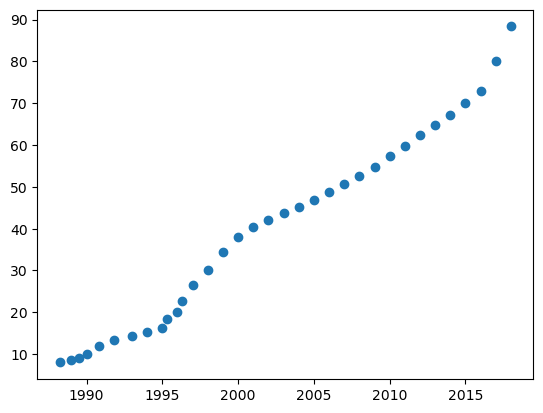

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(data['Periodo'], data['Salario'])
plt.show()

In [4]:
x=data['Periodo']
y=data['Salario']

In [5]:
#PASO 1 PARA NO TENER QUE REPETIR CADA UNO
X=np.reshape(x,[-1,1])
for p in range(2,4):
    x_f=np.reshape(x**p,[-1,1])
    X=np.hstack( (X,x_f)) 

X.shape


(34, 3)

In [6]:
#REGRESION PASO 2
from sklearn.linear_model import LinearRegression
import numpy as np

y_f=np.reshape(y,[-1,1])


reg=LinearRegression()
reg.fit(X,y_f)
reg.intercept_,reg.coef_,reg.score(X,y_f)

(array([-5217722.95741881]),
 array([[ 7.83146244e+03, -3.91934110e+00,  6.54024500e-04]]),
 0.9857366949634712)

In [9]:
y_pred=reg.predict(X)


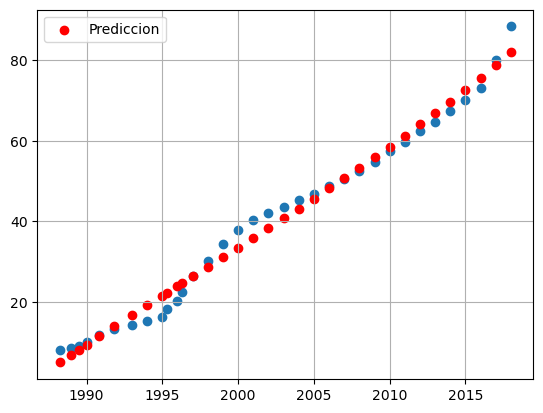

In [10]:
plt.figure()
plt.scatter(x,y)
plt.scatter(x,y_pred,c='r', label= 'Prediccion')
plt.grid()
plt.legend(loc='best')
plt.show()

In [11]:
y_pred.reshape(-1)

array([ 5.01692719,  6.91942919,  8.17717609,  9.42702506, 11.51034605,
       13.96645591, 16.78773124, 19.20035331, 21.59904229, 22.31651869,
       23.98772233, 24.70296126, 26.37031758, 28.75075219, 31.1329503 ,
       33.52083606, 35.91833362, 38.32936713, 40.75786072, 43.20773855,
       45.68292477, 48.18734352, 50.72491895, 53.2995752 , 55.91523643,
       58.57582677, 61.28527039, 64.04749142, 66.86641401, 69.74596231,
       72.69006046, 75.70263262, 78.78760292, 81.94889552])

In [12]:
#Aquí sacamos cuanto es el menor año que usamos
min(x)

1988.25

In [13]:
orden_de_polinomio=3

In [14]:
x_test=np.linspace(1988,2040,63)
X_test=np.reshape(x_test, [-1,1])
for p in range (2,orden_de_polinomio+1):
    x_f=np.reshape(x_test**p, [-1,1])
    X_test=np.hstack( (X_test, x_f) )
X_test.shape

(63, 3)

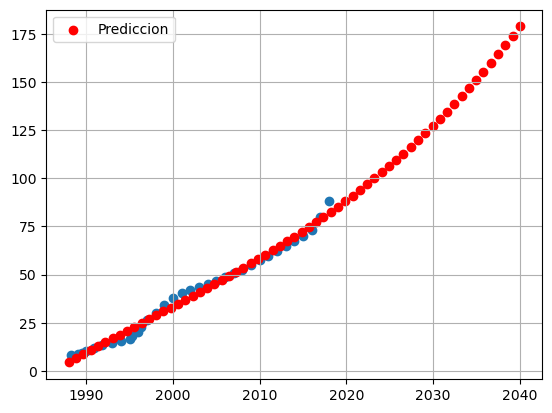

In [15]:
y_pred=reg.predict(X_test)
plt.figure()
plt.scatter(x,y)
plt.scatter(x_test,y_pred,c='r', label= 'Prediccion')
plt.grid()
plt.legend(loc='best')
plt.show()


In [23]:

x = data['Periodo'].values.reshape(-1, 1)
y = data['Salario'].values.reshape(-1, 1)

reg_lin = LinearRegression()
reg_lin.fit(x, y)
y_pred_lin = reg_lin.predict(x)



In [24]:
#R^2
r2_lin = reg_lin.score(x, y)

In [25]:
grados = [3, 5, 7, 9, 11]
r2_scores = []
predicciones = {}

for orden in grados:
    X_poly = np.hstack([x**p for p in range(1, orden + 1)])
    reg = LinearRegression()
    reg.fit(X_poly, y)
    y_pred = reg.predict(X_poly)
    r2 = reg.score(X_poly, y)
    r2_scores.append((orden, r2))
    
    # Predicción para x = 5
    x_pred = np.array([[5**p for p in range(1, orden + 1)]])
    y_pred_5 = reg.predict(x_pred)[0, 0]
    predicciones[orden] = y_pred_5

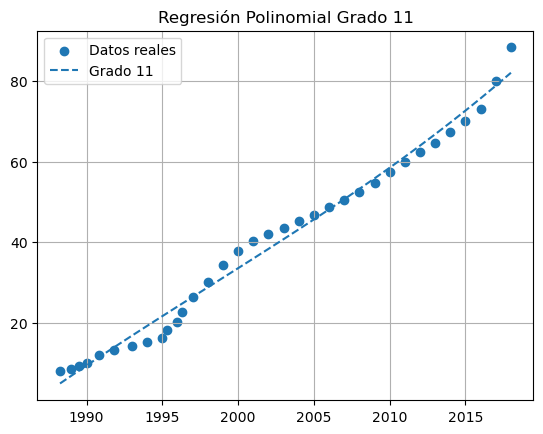

In [26]:
  # Graficar
plt.figure()
plt.scatter(x, y, label='Datos reales')
plt.plot(x, y_pred, label=f'Grado {orden}', linestyle='dashed')
plt.legend()
plt.title(f"Regresión Polinomial Grado {orden}")
plt.grid()
plt.show()

In [28]:

for orden, r2 in r2_scores:
    print(f"Grado {orden}: R^2 = {r2:.4f}, Predicción para x=5: {predicciones[orden]:.4f}")



Grado 3: R^2 = 0.9857, Predicción para x=5: -5178663.5470
Grado 5: R^2 = 0.9858, Predicción para x=5: -534328.7076
Grado 7: R^2 = 0.9858, Predicción para x=5: -156804.7796
Grado 9: R^2 = 0.9858, Predicción para x=5: -67286.0766
Grado 11: R^2 = 0.9858, Predicción para x=5: -35360.8672


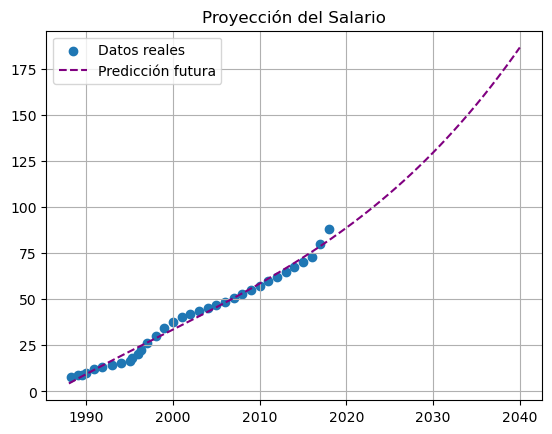

In [30]:
x_test = np.linspace(1988, 2040, 63).reshape(-1, 1)
X_test_poly = np.hstack([x_test**p for p in range(1, 12)])
y_pred_test = reg.predict(X_test_poly)

plt.figure()
plt.scatter(x, y, label='Datos reales')
plt.plot(x_test, y_pred_test, color='purple', linestyle='dashed', label='Predicción futura')
plt.legend()
plt.title("Proyección del Salario")
plt.grid()
plt.show()